# NNIA Assignment 5

**DEADLINE: 15. 12. 2021 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Trevor Atkins & trat00001 (Teams username e.g. trat00001@uni-saarland.de):
- Tsimafei Prakapenka & tspr00001 (Teams username e.g. tspr00001@uni-saarland.de):
- Hours of work per person:
Trevor Atkins: ~4hr, Tsimafei Prakapenka ~7h

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any **data or cache files** (e.g. `__pycache__`, the dataset PyTorch downloads, etc.). 
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

# Neural Network Implementation: Training, Forward Pass, and Backpropagation

At this point you already got familiar with the basic architecture of neural networks: hidden layers, activation
functions, loss functions, forward pass and back-propagation.

It's time to put it all together!

We have been playing around with PyTorch for a while. Although it is nice and convenient, we want to have a deeper understanding of what is really going on under the hood. For this purpose, we will create and train a simple 2-layer neural network from scratch using simple matrix operations and what we have learned so far.

In this exercise, we will work with [the PyTorch Datasets Class](https://pytorch.org/vision/stable/datasets.html) to obtain
[the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Our goal is to benchmark our simple neural network by classifying the images in this dataset into their proper classes.

# Part 1: Forward Pass and Backpropagation

This assignment will focus on the forward pass and backpropagation. We will continue to work with the same dataset in Part 2: Training and Fine-tuning in the next assignment.

## 1: The CIFAR10 dataset (2 pts)

### 1.1 Getting to know the Dataset (0.5 pts)
Have a look at the [the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and answer the following
questions:

1. What is the size of the datatset? Is it already divided into train and test sets?
2. What is the input? What shape does it have?
3. What shape would the output have?
4. What classes are represented in the dataset?


### 1.2 Pre-Processing  (0.5 pts)

Let's load the dataset into our workspace. We will do that by creating an instance of class [torchvision.datasets.CIFAR10](https://pytorch.org/vision/stable/datasets.html#cifar). Have a look at the parameters of the class:
- root
- train
- download
- transform
- target_transform

Make sure you understand what each of them means.

The input data that we load with torchvision are PIL images. We need to do some preprocessing before we can use the data for training. We can do that by passing an argument to the parameter *transform*.

1. We need to transform PIL images to tensors. **TODO**: find the corresponding function in *torchvision.transforms*.
2. It is a good practice to normalize your data before feeding it into the network. **TODO**: find the corresponding function in *torchvision.transforms*.
3. Right now each image has 3 dimensions: number of rows, number of columns and number of color channels (the latter is 3 in our case, as those are RGB images. If interested, you can read more about this in [Image Processing in Python Numpy](https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/)). We want to reshape each datapoint to be a flattened vector with size $= n_{row} \cdot n_{col} \cdot n_{channels}$. **TODO**: create a class that performs this function. 

### 1.3 (1 pt)
Now we have our train and test sets.
However, we would like to be able train different models with different hyperparameters in the future and compare them using a validation set (we will use the hold-out method).
For that we need to split our train data.
Let's use 10% of the data for validation.

## <font color="green">Answer</font>
Make sure to cite your sources.

### 1.1 


1. The size of the dataset is 60000 images. The dataset is also already divided into five training batches and one test batch, each with 10000 images.

2. The input are arrays of integer values of a 32x32 color image, where each row of an array (1024 entries each) is the red, green, and blue channels respectively. The input shape is 10000x3072 for batch and 1x3072 for an individual image.

3. The output would have the shape 10000x10 for batch and 1x10 for an individual image.

4. The 10 classes represented in the dataset are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

Source: 
https://www.cs.toronto.edu/~kriz/cifar.html

### 1.2 & 1.3

For Tasks 1.2 - 1.3, Please **complete the functions** in `solution.py` and run the following cells. Do *not* change the code cells below.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Transform PIL images to Tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        """
        Q1.2
        TODO: implement the function to reshape images into a vector of 'new_size', change the return accordingly
        :param img: original image Tensor of shape (C,H,W) or (H,W,C)
        :return: flattened image Tensor in new_size
        """
        return torch.reshape(img, self.new_size)

In [3]:
def get_cifar10_dataset(batch_size=128):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
         ReshapeTransform((3072,))])

    cifar10_dataset = CIFAR10(root='./data', download=True, transform=transform)

    trainset, valset = train_test_split(cifar10_dataset, test_size=0.1, shuffle=False)

    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               shuffle=False, num_workers=2)

    val_loader = torch.utils.data.DataLoader(valset, batch_size * 2, num_workers=4,
                                             pin_memory=True, shuffle=False)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                              shuffle=False, num_workers=2)

    return train_loader, test_loader, val_loader, cifar10_dataset.classes

In [4]:
train_loader, test_loader, val_loader, classes = get_cifar10_dataset()

170499072it [01:07, 2541287.76it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Verify the data are as expected

The follow code cells are provided for your convenience. Do *not* change

In [5]:
images, labels = next(iter(train_loader))

print('images.shape:', images.shape)
print('labels.shape:', labels.shape)

images.shape: torch.Size([128, 3072])
labels.shape: torch.Size([128])


Note that in order to visualize the image, we have to reshape the Tensor back to the C,H,W format.
Because of our manipulation, the image sample is not so clear. However, it's still possible to make out the correct class label for the sample.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: dog


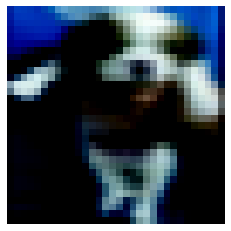

In [6]:
np.random.seed(23)
idx = np.random.randint(0, 128, 1)
plt.axis('off')
plt.imshow(images[idx].reshape((3, 32, 32)).permute((1,2,0)).numpy())
print('label:', classes[labels[idx]])

In [7]:
val_images, val_labels = next(iter(val_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([256, 3072])
labels.shape: torch.Size([256])
label: automobile


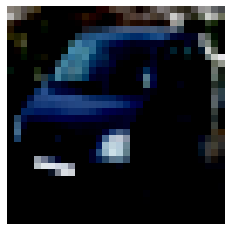

In [8]:
print('images.shape:', val_images.shape)
print('labels.shape:', val_labels.shape)
plt.axis('off')
plt.imshow(val_images[1].reshape((3, 32, 32)).permute((1,2,0)).numpy())
print('label:', classes[val_labels[1]])

## 2: The Forward Pass Computational Graph and Implementation (4 pts)

In this question we will implement a two-layered a neural network architecture as well as the loss function to train it. For this question, complete the required code in `solution.py`. Refer to the comments in the code to the exact places where you need to fill in the code.
Load the code cell in this notebook to verify your answer.

### The Model Architecture

The diagram below shows the visualization of the model architecture. Please note that the diagram only shows the schematic of the layers, the number of units are *not* representative of the actual sizes of the input, output, and hidden layers.

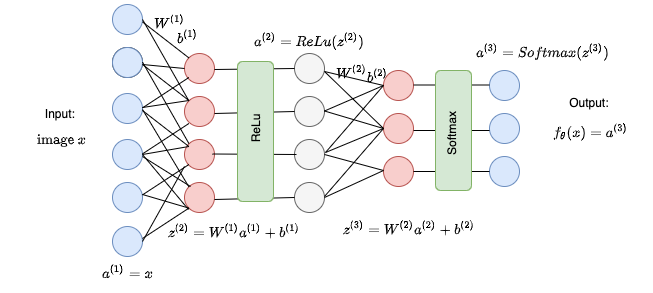

Our 2-layer neural network has an input layer and two model layers: a hidden and an output layer. 

The hidden layer consists of 50 units. The input layer and the hidden layer are connected via linear weight matrix $W^{(1)}$ and the bias term $b^{(1)}$. The parameters $W^{(1)}$ and $b^{(1)}$ are to be learnt during training. A linear operation is performed, $W^{(1)}x + b^{(1)}$, resulting in a vector $z{(2)}$.

It is then followed by a ReLU non-linear activation, applied element-wise on each unit, resulting in the activations $a^{(2)} = \text{ReLU}(z^{(2)})$.
As you know, the ReLU function has the following form:


\begin{align}
\tag{1}
\text{ReLU}(u) = \begin{cases} 
          u, & u \ge 0 \\
          0, & u < 0
       \end{cases}
\end{align}

A similar linear operation is performed on $a^{(2)}$, resulting in $z^{(3)} = W^{(2)}a^{(2)} + b^{(2)}$; it is followed by the softmax activation to result in $a^{(3)} =\text{softmax}(z^{(3)})$. The softmax function is defined
by:

\begin{align}
\tag{2}
\text{softmax}(u_{(i)}) = \frac{\exp^{u_{i}}}{\sum_{j}\exp^{u_{j}}}
\end{align}

In equation form, our network is as described below:

\begin{align}\tag{3}
a^{(1)} &= x \\
\tag{4}
z^{(2)} &= W^{(1)}a^{(1)} +b^{(1)}\\
\tag{5}
a^{(2)} &=\text{ReLu}(z^{(2)})\\
\tag{6}
z^{(3)} &= W^{(2)}a^{(2)} +b^{(2)}\\
\tag{7}
f_{\theta}(x) &:= a^{(3)} =\text{softmax}(z^{(3)})
\end{align}

The network takes as input a flattened vector and outputs a vector where each entry in the output $f_{k}(x)$ representing the probability of image $x$ corresponding to the class $k$. We indicate all the network parameters by $θ = (W^{(1)},b^{(1)},W^{(2)},b^{(2)})$.


### 2.1 (2 pts)
Draw a computational graph of the forward pass of the neural network as described above. Make sure to include the dimensions for all the nodes. You may submit any legible digital format into the notebook of the graph as long as 1) we can *easily* see the nodes, operations, and data dimensions right in the notebook and 2) *all* parts of the computational graph are *clearly* labeled and symbols have an explanation legend accompanying them.
The [graph drawing tool draw.io](https://draw.io/) is one of the options for you.

### 2.2 (2 pts)
For the neural network to learn the parameters $\theta = (W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)})$ to fit to the given data and label, we minimize the loss function. A popular choice of the loss function for training a neural network for a multi-class classification task is the cross-entropy loss. 

For a single input sample $x_{i}$, with label $y_{i}$, the loss function is defined as:


\begin{align}
\tag{8}
J(\theta, x_{i}, y_{i}) &= −\log P(Y = y_{i}, X = x_{i})\\
\tag{9}
&= − \log f_{\theta}(x_{i})_{y_{i}}\\
\tag{10}
&= − \log\text{softmax}(z^{(3)})_{y_{i}}\\
\tag{11}
J(\theta, x_{i}, y_{i}) &= −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
\end{align}


Averaging over the whole training set, we get:

\begin{align}
\tag{12}
J(\theta, \{x_{i}, y_{i}\}^{N}_{i = 1}) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
\end{align}


where $K$ is the number of classes. Note that if the model has perfectly fitted to the data (i.e. $f_{\theta}^{k}(x_{i}) = 1$ whenever $x_{i}$ belongs to class $k$ and $0$ otherwise), then $J$ attains the minimum of $0$.

Apart from trying to correctly predict the label, we have to prevent overfitting the model to the current training data for better generalization to unseen data. We add an $L_{2}$ regularisation term over the model parameters $\theta$. Specifically, the loss function is defined by:


\begin{align}
\tag{13}
\tilde{J}(\theta) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
+ \lambda \big( \Vert W^{(1)}\Vert^{2}_{2} + \Vert W^{(2)} \Vert^{2}_{2} \big)
\end{align}


where $\Vert \cdot \Vert^{2}_{2}$ is the squared $L_{2}$ norm. For example,


\begin{align}
\tag{14}
\Vert W^{(1)} \Vert^{2}_{2} &= \sum^{R}_{p=1}\sum^{S}_{q=1}{W^{(1)}_{pq}}^{2}, \text{where }R = \text{hidden size},S = \text{input size}
\end{align}


**Implement the code in `solution.py`** for the *forward pass* of model up to the *loss function* as described above. You are required to implement **Eq. 3 to 7** as well as **Eq. 11 - 13**.

To be able to train the above model on large datsets, with larger layer widths, the code has to be very efficient. To do this you should **avoid** using any python `for` loops in the forward pass and instead use matrix/vector multiplication in the *numpy* library.

## 2.1 <font color="green"> Answer </font>

I was unable to embed computational graph directly to the notebook, here is the link to github.

[Computational graph](https://github.com/tsimafeip/LCT-master-course/blob/main/UdS/Neural_Networks/HW5_comp_graph.png)

## 2.2

Run the cells below to verify your answer. Do not change any of the codes below. If you encounter errors, revise your work in `solution.py`.

In [9]:
%%capture
! pip install wget

In [10]:
import wget
path_to_source_utils_file = 'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Neural_Networks/HW5_utils.py'
utils_localname = 'utils.py'

if not os.path.isfile(utils_localname):
   wget.download(path_to_source_utils_file, utils_localname)

path_to_source_solution_file = 'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/UdS/Neural_Networks/HW5_solution.py'
utils_localname = 'solution.py'

if not os.path.isfile(utils_localname):
   wget.download(path_to_source_solution_file, utils_localname)

In [11]:
%load_ext autoreload
%autoreload 2

from solution import NeuralNetworkModel
from utils import correct_scores, correct_loss

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
num_samples = 5

toy_net = NeuralNetworkModel(input_size, hidden_size, num_classes)
scores = toy_net.loss(val_images[:num_samples,:])

assert np.allclose(correct_scores(), scores)

print(f'Difference between your scores and correct scores:\n'
      f'{np.sum(np.abs(scores - correct_scores()))}\n'
      f'Scores difference < 1e-5: {np.sum(np.abs(scores - correct_scores())) < 1e-5}\n')

Difference between your scores and correct scores:
5.277891246727173e-06
Scores difference < 1e-5: True



In [12]:
loss, _ = toy_net.loss(val_images[:num_samples,:], val_labels[:num_samples], reg=0.05)

print(f'Correct loss: {correct_loss()}\n'
      f'Difference between your loss and correct loss:\n'
      f'{np.sum(np.abs(loss - correct_loss()))}\n'
      f'Loss difference < 1e-5: {np.sum(np.abs(loss - correct_loss())) < 1e-5}\n')

Correct loss: 2.3026622144610953
Difference between your loss and correct loss:
3.9591572642549977e-07
Loss difference < 1e-5: True



## 3 Backpropagation (4 pts + 2 Bonus pts)

When we train our model, we are trying to solve the following minimization function via stochatic gradient descent:

$$ \begin{align}
\tag{15}
\min_{\theta} \tilde J (\theta) 
\end{align}$$

To find the gradients $\nabla_{\theta} \tilde J(\theta)$, we perform backpropagation from the output layer to the parameters $\theta$ at different layers. Backpropagation is simply a sequential application of chain rule as covered in the lecture and your course materials. For each parameter $\theta$ in the model we want to compute the effect that parameter has on the loss, we compute the derivatives of the loss w.r.t each model parameter.

### 3.1 Gradient Calculation (2 pts + 2 Bonus pts)

Complete 2 of the following derivative calculations. For 2 Bonus points, complete the rest of them.

1. Verify that the loss function defined in **Eq.12** has the gradient w.r.t $ z^{(3)}$ as below (i.e. derive the following gradient):

\begin{align}
\tag{16}
\frac{\delta J}{\delta z^{(3)}}(\{x_i,y_i\}^{N}_{i=1}) &= \dfrac{1}{N}\text{softmax}(z^{(3)}) - \Delta \\
\end{align}

where $\Delta$ is a matrix of $N × K$ dimensions with:

\begin{align}
\tag{17}
\Delta_{i,j} = \begin{cases} 
          1, & \text{if }  y_{i} = j \\
          0, & \text{otherwise}
       \end{cases}
\end{align}

2. Verify that the partial derivative of the loss w.r.t $W^{(2)}$ is:

\begin{align}
\tag{18}
\frac{\delta J}{\delta W^{(2)}}(\{x_i,y_i\}^{N}_{i=1}) &= \frac{\delta J}{\delta z^{(3)}} \cdot \frac{\delta z^{(3)}}{\delta W^{(2)}} \\
\tag{19}
&= \dfrac{1}{N} \big(\text{softmax}(z^{(3)}) - \Delta \big) \cdot a^{(2)}
\end{align}

3. Verify that the regularized loss in **Eq. 13** has the following derivative w.r.t $W^{(2)}$:

\begin{align}
\tag{20}
\frac{\delta \tilde J}{\delta W^{(2)}} = \dfrac{1}{N} \big(\text{softmax}(z^{(3)}) - \Delta \big) \cdot a^{(2)} + 2\lambda W^{(2)}
\end{align}

4. Dervive the expressions for the derivatives of the regularized loss in *Eq.13* w.r.t *$W^{(1)}, b^{(1)}, b^{(2)}$*.  These are referred to as Eq. 21-23 in `solution.py`. You should at least try to complete this as you will need to come up with the formulas for these derivatives to complete the next section, 3.2.

**Note:** Activation functions are applied *element-wise*, so the derivative of an activation function has the shape as the original input to the activation function. E.g. if we have $f(a)$, where $a \in \mathbb{R}^{n \times m}$, then $f(a) \in \mathbb{R}^{n \times m}$ and $(\nabla_{a} f(a)) \in \mathbb{R}^{n \times m}$. Hence, the derivative of the activation function is also applied **element-wise**.

### 3.2 Backpropagation Implementation (2 pts)

Using the expressions you obtained for the derivatives of the loss w.r.t model parameters, **implement** the back-propogation algorithm in the file `solution.py`. (i.e. **Eq. 16, 17, 19, 20, 21-23**)
Note that even though normally you would use PyTorch's autograd for this, you should write the optimization formulas without it here.

## 3.1 <font color="green"> Answer </font>

1) 
\begin{align}
\tag{12}
J(\theta, \{x_{i}, y_{i}\}^{N}_{i = 1}) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
\end{align}


1. <br>

I would like to rewrite J function for the single entry in the following way:

\begin{align}
\tag{3.1.1}
J(\theta, x, y) &= \frac{1}{N} (−\sum^K_{i = 1} y_i \log (s_i))
\end{align}

and introduce J':

\begin{align}
\tag{3.1.2}
J'(\theta, x, y) &= -\sum^K_{i = 1} y_i \log (s_i)
\end{align}

$s_i$ is just a new way to write softmax 
\begin{align}
\tag{3.1.3}
s_i &= \frac{\exp^{z^{(3)}_{i}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}}
\end{align}

and $y_i$ under sum is 1 only on i-th place, otherwise 0.

Now let's consider the following derivative ($z^{3}_j = z_j$ for simplicity):

\begin{align}
\tag{3.1.4}
\frac{\delta J'}{\delta z^{}_j} &= - \frac{\delta}{\delta z_j} \sum^K_{i = 1} y_i \log (s_i) = - \sum^K_{i = 1} y_i (\frac{\delta}{\delta z_j} \log (s_i))
\end{align}

From 3.1.4:

\begin{align}
\tag{3.1.5}
\frac{\delta}{\delta z_j} \log (s_i)
&= [\text {w.r.t. 3.1.3 and rule that} \log (\frac{a}{b}) = \log (a) - \log (b)] = \\
&= \frac{\delta z^{}_i}{\delta z^{}_j} - \frac{\log \sum^{K}_{l}\exp^{z_{l}}}{\delta z^{}_j} = \\
&= 1\{i=j\} - \frac{1}{ \sum^{K}_{l}\exp^{z_{l}}}*(\frac{ \sum^{K}_{l}\exp^{z_{l}}}{\delta z^{}_j})
\end{align}

From 3.1.5:

\begin{align}
\tag{3.1.6}
\frac{ \sum^{K}_{l}\exp^{z_{l}}}{\delta z^{}_j} = \frac{\delta}{\delta z_j} (exp^{z_1} + exp^{z_2} + ... + exp^{z_j} + ... + exp^{z_k}) 
&= \frac{exp^{z_j}}{\delta z_j} = exp^{z_j}
\end{align}

Combining 3.1.5 and 3.1.6:
\begin{align}
\tag{3.1.7}
\frac{\delta}{\delta z_j} \log (s_i) 
&= 1\{i=j\} - \frac{exp^{z_j}}{ \sum^{K}_{l}\exp^{z_{l}}}
= 1\{i=j\} - s_j
\end{align}

Combining 3.1.4 and 3.1.7:
\begin{align}
\tag{3.1.8}
\frac{\delta J'}{\delta z^{}_j} &= - \sum^K_{i = 1} y_i (1\{i=j\} - s_j) \\
&= - (\sum^K_{i = 1} y_i * 1\{i=j\} - \sum^K_{i = 1} y_i s_j) \\
&= s_j \sum^K_{i = 1} y_i - y_j = s_j - y_j
\end{align}

By going back from J' to J (multiply 3.1.8 by $\frac{1}{N}$) and rewriting individual level derivative to the vector form we are obtaining the requested result.

2. Using result of 3.1.1 task and chain rule provided in 3.2.1 task definition, we need to prove only that $$\frac{\delta z^{(3)}}{\delta W^{(2)}}=a^{(2)}$$

\begin{align}
\tag{3.2.1}
\frac{\delta z^{(3)}}{\delta W^{(2)}} &= \frac{\delta }{\delta W^{(2)}}(W^{(2)}a^{(2)} +b^{(2)}) = a^{(2)}
\end{align}

3. I use (13) and (19):

\begin{align}
\tag {3.2.1}
\frac{\delta \tilde J}{\delta W^{(2)}} 
&= \frac{\delta }{\delta W^{(2)}} (J + \lambda \big( \Vert W^{(1)}\Vert^{2}_{2} + \Vert W^{(2)} \Vert^{2}_{2} \big)) \\
&= \frac{\delta J}{\delta W^{(2)}} + 2\lambda W^{(2)} \big( \frac{\delta (\Vert W^{(2)} \Vert)}{\delta W^{(2)}} \big) \\
&= \dfrac{1}{N} \big(\text{softmax}(z^{(3)}) - \Delta \big) \cdot a^{(2)} + 2\lambda W^{(2)}
\end{align}

4. Derivative w.r.t to $b^{(2)}$ is as follows.

\begin{align}
\frac{\partial J}{\partial b^{(2)}} (\{x_i,y_i\}^{N}_{i=1}) &=  \frac{\partial J}{\partial z^{(3)}} \cdot \frac{\partial z^{(3)}}{\partial b^{(2)}}\\
&= \frac{\partial J}{\partial z^{(3)}} \cdot 1 \\
&= \dfrac{1}{N} (Softmax(z^{(3)}) - \Delta)\\
\end{align}

Derivative w.r.t to $W^{(1)}$


\begin{align}
\frac{\delta J}{\delta W^{(1)}} (\{x_i,y_i\}^{N}_{i=1}) &=  \frac{\delta J}{\delta z^{(3)}} \cdot \frac{\delta z^{(3)}}{\delta a^{(2)}} \cdot \frac{\delta a^{(2)}}{\delta z^{(2)}} \cdot \frac{\delta z^{(2)}}{\delta W^{(1)}}\\
&= (\dfrac{1}{N} \psi(z^{(3)}) - \Delta) \cdot \frac{\delta z^{(3)}}{\delta a^{(2)}}\cdot \frac{\delta a^{(2)}}{\delta z^{(2)}} \cdot \frac{\delta z^{(2)}}{\delta W^{(1)}}\\
\frac{\delta z^{(3)}}{\delta a^{(2)}} &= \frac{\delta}{\delta a^{(2)}} \big( W^{(2)}a^{(2)} + b^{(2)}\big) \\
&= W^{(2)} \\
\frac{\delta a^{(2)}}{\delta z^{(2)}} &= \frac{\delta}{\delta z^{(2)}} \big( ReLu(z^{(2)}) \big) \\
&= ReLu'(z^{(2)}) \\
\frac{\delta z^{(2)}}{\delta W^{(1)}} &= \frac{\delta}{\delta W^{(1)}} \big( W^{(1)}a^{(1)} + b^{(1)} \big) \\
&= a^{(1)} \\
\frac{\delta J}{\delta W^{(1)}} (\{x_i,y_i\}^{N}_{i=1}) &= \dfrac{1}{N} (\psi(z^{(3)}) - \Delta) \cdot W^{(2)} \cdot ReLu'(z^{(2)}) \cdot a^{(1)} \\
\end{align}

where,

\begin{align}
ReLu'(x) = \begin{cases} 
          0 & x < 0 \\
          1 & otherwise
       \end{cases}
\end{align}


Derivative w.r.t to $b^{(1)}$ is as follows.


\begin{align}
\frac{\delta J}{\delta b^{(1)}} (\{x_i,y_i\}^{N}_{i=1}) &=  \frac{\delta J}{\delta z^{(3)}} \cdot \frac{\delta z^{(3)}}{\delta a^{(2)}} \cdot \frac{\delta a^{(2)}}{\delta z^{(2)}} \cdot \frac{\delta z^{(2)}}{\delta b^{(a)}}\\
&= \dfrac{1}{N} (\psi(z^{(3)}) - \Delta) \cdot W^{(2)} \cdot ReLu'(z^{(2)}) \cdot 1 \\
\end{align}


Note that for both $b^{(1)}$ and $b^{(2)}$, since there're no $b$ terms in the regularization formula, that part of the derivative is $= 0$


## 3.2

After completing the code in `solution.py`. Run the code cell below to verify your answer. Do *not* change any code below.

In [13]:
%load_ext autoreload
%autoreload 2

from utils import eval_numerical_gradient, rel_error, init_toy_data
from solution import NeuralNetworkModel

# computing the numerical gradient for W1 and b1 on the actual data would take way too long with the eval_numerical_gradient function
# hence the toy data
X_sm, y_sm = init_toy_data()
toy_net_small = NeuralNetworkModel(input_size=4, hidden_size=10, output_size=3, std=1e-1)
sm_loss, sm_grads = toy_net_small.loss(X_sm, y_sm, reg=0.05)

for param_name in sm_grads:
    f = lambda W: toy_net_small.loss(X_sm, y_sm, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, toy_net_small.params[param_name], verbose=False)
    print(f'{param_name} max relative error: {rel_error(param_grad_num, sm_grads[param_name])}; '
          f'error < 1e-8: {rel_error(param_grad_num, sm_grads[param_name]) < 1e-8}')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
W2 max relative error: 1.0; error < 1e-8: False
b2 max relative error: 1.0; error < 1e-8: False
W1 max relative error: 1.0; error < 1e-8: False
b1 max relative error: 1.0; error < 1e-8: False
